# Análise léxica
Este notebook é parte da documentação de uma exploração de dados realizada para o artigo _**O uso da Cloroquina no tratamento da Covid-19 debatido no Facebook**: um estudo em opinião pública com processamento de linguagem natural_.

Aqui, a intenção é analisar o texto e os termos empregados pelos usuários em seu contexto. Se possível, encontrar os jargões, expressões, slogans e a linguagem compartilhada entre esses grupos de apoiadores ou detratores. É possível que nos deparemos com alguns dos problemas de tratamento de texto em português levantados na análise inicial. Por as bibliotecas não tratarem português diretamente, pode ser que não elas não captem algumas coisas ou exijam tradução do corpus.

## Importando e lendo os dados
Como o objetivo aqui é analisar os termos em seu contexto de uso, nosso ponto de partida é o texto completo dos comentários. Novamente, abrindo os arquivos onde cada linha corresponde a um comentário de usuário.

In [1]:
# montando o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# o caminho dos arquivos
!ls '/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo'

content1.csv  content3.csv  content5.csv  content7.csv
content2.csv  content4.csv  content6.csv


In [4]:
# abrindo datasets
data1 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content1.csv')
data2 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content2.csv')
data3 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content3.csv')
data4 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content4.csv')
data5 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content5.csv')
data6 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content6.csv')
data7 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content7.csv')

# lendo datasets
data1 = data1.read()
data2 = data2.read()
data3 = data3.read()
data4 = data4.read()
data5 = data5.read()
data6 = data6.read()
data7 = data7.read()

## Alguns experimentos com o corpus
Analisar linguagem natural é um processo complexo, que exige olhos atentos para o corpus o tempo todo. As experimentações aqui realizadas têm mais o intuito de explorar o conteúdo em busca de insights para o artigo, permitindo que esse olhar mais atento seja conduzido e auxiliado pelas ferramentas disponíveis. Para nossos propósitos, vamos usar o [NLTK](http://www.nltk.org/) e o [TextBlob](https://textblob.readthedocs.io/), já utilizados em experimentos anteriores.

Abaixo, temos uma tentativa de tagear os termos do nosso corpus conforme classificação gramatical. Esse processo, no PLN, se chama **Part-of-Speech Tagging**. Por exemplo, JJ são adjetivos, NN são nouns/substantivos, MD é modal, RB é advérbio, FW é palavra estrangeira etc — [aqui tem uma lista](https://www.geeksforgeeks.org/python-part-of-speech-tagging-using-textblob/). Deu pra ver que esse tagueador do TextBlob erra algumas coisas não triviais. Por exemplo, ele classificou "pensar" como uma palavra estrangeira, "nem" como adjetivo, "não" como substantivo etc. Nos [tutoriais da documentação](http://www.nltk.org/howto/portuguese_en.html), os pesquisadores demonstram o uso dessa ferramenta na criação de classificadores que usam dados anotados.


In [5]:
# importando NLTK, TextBlob e dependências
import nltk
from textblob import TextBlob
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.corpus.stopwords.words('portuguese')

# tageamento dos termos conforme classificação gramatical
blob = TextBlob(data1)
blob.tags

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Conteúdo', 'NNP'),
 ('Os', 'NNP'),
 ('casos', 'NN'),
 ('eram', 'NN'),
 ('graves', 'NNS'),
 ('Estavam', 'NNP'),
 ('com', 'NN'),
 ('respiradores', 'NNS'),
 ('Ac', 'NNP'),
 ('Somente', 'NNP'),
 ('casos', 'NN'),
 ('graves', 'NNS'),
 ('estão', 'VBP'),
 ('usando', 'JJ'),
 ('cloroquina', 'VBP'),
 ('Up', 'RP'),
 ('Glória', 'NNP'),
 ('à', 'NNP'),
 ('Deus', 'NNP'),
 ('Ac', 'NNP'),
 ('Gloria', 'NNP'),
 ('a', 'DT'),
 ('Deus', 'NNP'),
 ('❤️', 'NNP'),
 ('Deus', 'NNP'),
 ('e', 'NN'),
 ('maravilho', 'NN'),
 ('Amém', 'NNP'),
 ('Amém', 'NNP'),
 ('Que', 'NNP'),
 ('continue', 'VBP'),
 ('dando', 'NN'),
 ('certo', 'NN'),
 ('a', 'DT'),
 ('todos', 'NN'),
 ('Tomara', 'NNP'),
 ('Isso', 'NNP'),
 ('não', 'MD'),
 ('é', 'VB'),
 ('nem', 'JJ'),
 ('perto', 'NN'),
 ('de', 'IN'),
 ('ser', 'FW'),
 ('a', 'DT'),
 ('solução', 'NN'),
 ('Para', 'NNP'),
 ('de', 'IN'),
 ('pensar', 'FW'),
 ('negativo', 'NN'),
 ('Por', 'NNP'),
 ('isso', 'NN'),
 ('que', 'NN'),
 ('o', 'JJ'),
 ('brasil', 'NN'),
 ('nao', 'NN'),
 ('vai', 'NN'),
 ('

Uma outra forma possível são as que levantam [n-gramas](https://en.wikipedia.org/wiki/N-gram) e [noun phrases](https://en.wikipedia.org/wiki/Noun_phrase). Tanto um quanto o outro têm aplicação na inteligência artificial e nos algoritmos de previsão de itens de uma sequência; por exemplo, aquelas sugestões que os sistemas às vezes nos apresentam no teclado do celular. Eles podem ajudar a levantar a frequência de uma dada sequência de itens em um material textual. 

Noun phrases (em português, frases nominais) são frases sem verbos e com função de substantivo. As noun phrases dependem de um correto tageamento da amostra para funcionarem bem nas aplicações, enquanto que n-gramas são sequências simples. Se na amostra houver muitas vezes a expressão "bolsonaro recomenda" — um _bi-grama_ —, possivelmente ela será identificada. O "n", no caso, é a quantidade de itens na sequência; pode ser 1, pode ser mais de 1.

In [6]:
# plotando frases nominais
blob.noun_phrases

WordList(['conteúdo os', 'casos eram graves', 'estavam', 'com respiradores', 'ac somente', 'casos graves estão usando cloroquina', 'up glória', 'deus', 'ac gloria', 'deus', 'deus', 'e maravilho', 'amém amém', 'que', 'dando certo', 'tomara isso', 'não é nem perto', 'para', 'pensar negativo', 'por', 'isso que o brasil nao vai pra frente', 'amém', 'deve', 'feike', 'não', 'estava em estado', 'grave e já tinha até se despedido da família', 'mãe', 'donos da', 'prevent senior', 'é tratada com cloroquina', 'temos', 'uol.com.br mãe', 'donos da', 'prevent senior', 'é tratada com cloroquina', 'temos', 'mãe', 'donos da', 'prevent senior', 'é tratada com cloroquina', 'temos', 'difícilmente ele irá postar algo fake', 'para', 'pensar negativo', 'por', 'isso que o brasil nao vai pra frente', 'isso', 'para quem consegue comprovar que tem o vírus', '🙏🏼 🙏🏼 🙏🏼', 'lembrando', 'que não é só o uso', 'cloroquina é em conjunto com', 'azitromicina', 'e um coquetel junto com', 'oxacilina', 'rinfanpricina só tem 

In [7]:
# também é possível contar quantas vezes cada frase nominal se repete
blob.np_counts

defaultdict(int,
            {'conteúdo os': 1,
             'casos eram graves': 1,
             'estavam': 1,
             'com respiradores': 1,
             'ac somente': 1,
             'casos graves estão usando cloroquina': 1,
             'up glória': 1,
             'deus': 27,
             'ac gloria': 1,
             'e maravilho': 1,
             'amém amém': 1,
             'que': 5,
             'dando certo': 1,
             'tomara isso': 1,
             'não é nem perto': 1,
             'para': 4,
             'pensar negativo': 2,
             'por': 3,
             'isso que o brasil nao vai pra frente': 2,
             'amém': 6,
             'deve': 1,
             'feike': 1,
             'não': 22,
             'estava em estado': 1,
             'grave e já tinha até se despedido da família': 1,
             'mãe': 2,
             'donos da': 3,
             'prevent senior': 3,
             'é tratada com cloroquina': 3,
             'temos': 4,
             '

In [8]:
# todos os 5-grams com a palavra 'bolsominion'
word = 'bolsominion'
bolsom = [x for x in blob.ngrams(5) if word in x]
bolsom

[WordList(['remédio', 'Vc', 'é', 'um', 'bolsominion']),
 WordList(['Vc', 'é', 'um', 'bolsominion', 'burrão']),
 WordList(['é', 'um', 'bolsominion', 'burrão', 'calma']),
 WordList(['um', 'bolsominion', 'burrão', 'calma', 'o']),
 WordList(['bolsominion', 'burrão', 'calma', 'o', 'carrinho'])]

Esses módulos do TextBlob, além das questões da correta classificação de corpus em língua portuguesa, podem ter aplicações em programas mais complexos. Além deles, existem alguns outros módulos interessantes no NLTK. Esse módulo [_concordance_](http://www.nltk.org/api/nltk.html?highlight=concordance#nltk.text.Text.concordance), por exemplo, mostra as palavras em contexto de forma melhor que os n-gramas e as frases nominais.

In [9]:
# importando ferramentas do NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.text import Text

# tokenização automática dos datasets, sem todo aquele cuidado que tivemos com as wordclouds
text1 = Text(word_tokenize(data1))
text2 = Text(word_tokenize(data2))
text3 = Text(word_tokenize(data3))
text4 = Text(word_tokenize(data4))
text5 = Text(word_tokenize(data5))
text6 = Text(word_tokenize(data6))
text7 = Text(word_tokenize(data7))

In [10]:
# 'cloroquina' em contexto na thread 4
text3.concordance('cloroquina')

Displaying 25 of 37 matches:
s devo ter ao usar o Difosfato de Cloroquina ? Advertências A cloroquina é um 
to de Cloroquina ? Advertências A cloroquina é um fármaco que apresenta estrei
ientes que recebem tratamento com cloroquina em altas doses em longo prazo , d
enal . Não utilize o difosfato de cloroquina se tiver conhecimento de II '' , 
ácia que comprove que realmente a cloroquina é o remédio mais eficaz no combat
ra de Lúpus , que já faz o uso de Cloroquina por mais de 5 anos . O medicament
do no mundo sobre a eficiência da cloroquina contra o coronavírus . No Brasil 
HD em coronavírus que dizem que a cloroquina é a cura . nossa , finalmente alg
ssinaria autorização para receber cloroquina . Se não estivesse , gostaria que
ais terriveis Queria saber pq com cloroquina e tao terrivel os efeitos ... Pfv
nte dela contra o coronavírus . A cloroquina em excesso pode causar sequelas g
e é o x da questão , as pesquisas cloroquina x coronavírus ainda estão em está
 um ataque cardíaco por

In [11]:
# 'remédio' em contexto na thread 5
text5.concordance('remédio')

Displaying 25 of 41 matches:
para outras ? exato ! como qualquer remédio , né ? Já que faz tão mal para ela 
rasil que tem torcida organizada de remédio ? 12:53 17 mai 20 Twitter Web App '
jura ? Prefere morrer que tentar um remédio que não precisava de receita e que 
rus não . era para morrer ? Não tem remédio , o que está dando certo é esse med
 uso super estudiosos em relação ao remédio 😒 vai receitar o q ? Se tem várias 
dos os remédios ngm tomaria desde o remédio mais simples . De forma alguma , to
propinas das vendas . Propina de um remédio que custa 6 reais a caixa com 30 co
NEJM Não Se estavam receitando ateh remédio pra piolhos como prevenção ... tão 
Tomaria sim ! Lógico , que sim esse remédio já existia pra outras coisas ele nã
stia pra outras coisas ele não é um remédio inventado , eita povo polêmico segu
. Porque você disse que tomaria uma remédio somente para prevenir a não pegar a
 só quero que você entenda o que um remédio pode causar sem precisar tomar . Ma
dicaria par

No experimento abaixo é possível detectar um problema na limpeza dos dados: na etapa de coleta de dados, o web scraper coletou o conteúdo total dos comentários, o que inclui a pré-visualização dos links gerados pelo Facebook. O texto desses links acaba se repetindo algumas vezes depois que esse material tem as tags do código da página removidas. Isso pode ser corrigido limpando manualmente esses vestígios e repetições das tabelas e arquivos que guardam esses dados.

In [12]:
# interessante: menções diretas à doença geralmente são de links de notícias...
text2.concordance('covid-19')
print('---------------')
text2.concordance('covid')
print('---------------')
text2.concordance('corona')
print('---------------')
text2.concordance('coronavirus')
print('---------------')
text2.concordance('coronavírus')

Displaying 14 of 14 matches:
omedicar com cloroquina para curar covid-19 < br > NOTICIAS.R7.COM < br > Home
omedicar com cloroquina para curar covid-19 < br > Homem morre ao se automedic
omedicar com cloroquina para curar covid-19 cada organismo reage de um jeito .
omedicar com cloroquina para curar covid-19 < br > NOTICIAS.R7.COM < br > Home
omedicar com cloroquina para curar covid-19 < br > Homem morre ao se automedic
omedicar com cloroquina para curar covid-19 Pessoas já morreram acreditando ne
 vc ou alguém da sua família pegar covid-19 vc abre mão do tal medicamento ? D
e remédio que está em teste contra covid-19 prejudica pacientes < br > NOTICIA
e remédio que está em teste contra covid-19 prejudica pacientes < br > Falta d
e remédio que está em teste contra covid-19 prejudica pacientes várias pessoas
ios da Cloroquina no tratamento do covid-19 . Falou que o estudo feito pelo Dr
 Cloroquina como `` O remédio para COVID-19 '' , ele é um quebra galho que vai
gem pode conter : texto

In [13]:
# muitas menções religiosas
text2.concordance('deus')
print('---------------')
text2.concordance('fé')
print('---------------')
text2.concordance('amém')

Displaying 25 of 49 matches:
                                     Deus ! ! ! eu acredito 👏 👏 👏 Up Up pq fak
 . é óbvio que é fake ! Pelo amor de Deus raciocinem ! estória Se tá de sacana
 milagrosa ? É fajev teimosa @ ! meu Deus ... de gracas a Deus que algo tá dan
teimosa @ ! meu Deus ... de gracas a Deus que algo tá dando certom Não sabe ne
ra não eis vi a entrevista na Record Deus te ouça quê tudo vai da certo , prec
esinformada verdade em nome de Jesus Deus vai estruir os médicos para o tratam
rus é só não utilizar da medicação , Deus queira que não precise , já que você
izendo que a OMS não aprova GRAÇAS A DEUS ... AMÉEMM ... https : //www.faceboo
094/posts/1814433758687493/ Gloria a Deus . Glória a Deus , vê notícia positiv
3758687493/ Gloria a Deus . Glória a Deus , vê notícia positiva 😍 Eu vi essa r
o imagina oque tá pra acontecer , se Deus quiser logo descobrem a cura 🙌🏻 Infe
cem que torcem p não dá certo ... só Deus ! sim a impressão que passa é temos 
idade te acompanhe . Va

Abaixo, temos as **collocations**, que é mais uma forma de identificar termos que aparecem juntos em um texto; é um tipo de ferramenta para análise de co-ocorrência e tem quase a mesma função analítica das frases nominais e n-gramas.

In [14]:
# collocations
text1.collocations(num=100)

Quatro pacientes; tiveram alta; imagem pode; pode conter; UTI tiveram;
com uso; Indivíduos necessitando; Ver mais; que diz; Homem morre;
ISTOÉ Independente; UOL.COM.BR Quatro; estado grave; texto que;
efeitos colaterais; hidroxicloroquina UOL.COM.BR; População infectada;
Live Coronavírus; coronavírus têm; após tomarem;
//www.uol.com.br/vivabem/noticias/redacao/2020/03/26/quatro-pacientes-
de-uti-tiveram-alta-em-sp-com-uso-de-hidroxicloroquina.htm Quatro;
Imperial College; nos jornais; EUA após; têm alta; internada nos;
tomarem cloroquina; necessitando hospitalização; nos EUA;
hidroxicloroquina Quatro; alta após; ATILA IAMARINO; Chlorine dioxide;
Este perfil; Estudo limitado; Prevent Senior; Reino Unido; VERDADE
REVELADA; causam corrida; chineses concluem; cuidados básicos; dioxide
registered; encontra evidências; estamos errando; liga nas; supera
cuidados; 🐴🐴🐴 ATILA; com coronavírus; distanciamento social;
espalhando Fakenews; Demanda por; efeito colateral; Passou nos; afirma
estudo; c

O NLTK tem sua própria ferramenta de identificação e contagem de n-gramas. No caso, os mais comuns são em geral aqueles textos providos pela pré-visualização de links externos do Facebook, o que prejudica um pouco a análise que tem por objetivo avaliar material autoral dos usuários.

In [15]:
# mais algumas bibliotecas e recursos para gerar n-gramas
import re, string, collections
from nltk.util import ngrams

freqng = collections.Counter(ngrams(text2, 6)).most_common(30)
freqng

[(('<', 'br', '>', 'Coronavírus', ':', 'Anvisa'), 9),
 (('br', '>', 'Coronavírus', ':', 'Anvisa', 'alerta'), 9),
 (('>', 'Coronavírus', ':', 'Anvisa', 'alerta', 'sobre'), 9),
 (('Coronavírus', ':', 'Anvisa', 'alerta', 'sobre', 'uso'), 9),
 ((':', 'Anvisa', 'alerta', 'sobre', 'uso', 'de'), 9),
 (('Anvisa', 'alerta', 'sobre', 'uso', 'de', 'hidroxicloroquina'), 9),
 (('alerta', 'sobre', 'uso', 'de', 'hidroxicloroquina', 'e'), 9),
 (('sobre', 'uso', 'de', 'hidroxicloroquina', 'e', 'cloroquina'), 9),
 (('…', '<', 'br', '>', 'Ver', 'mais'), 7),
 (('A', 'imagem', 'pode', 'conter', ':', 'texto'), 7),
 (('imagem', 'pode', 'conter', ':', 'texto', 'que'), 7),
 (('pode', 'conter', ':', 'texto', 'que', 'diz'), 7),
 (('conter', ':', 'texto', 'que', 'diz', '``'), 7),
 (('<', 'br', '>', 'Homem', 'morre', 'ao'), 6),
 (('br', '>', 'Homem', 'morre', 'ao', 'se'), 6),
 (('>', 'Homem', 'morre', 'ao', 'se', 'automedicar'), 6),
 (('Homem', 'morre', 'ao', 'se', 'automedicar', 'com'), 6),
 (('morre', 'ao', 'se'

## Frequência léxica
O NLTK possui um pequeno módulo de geração de gráficos que, apesar de se valer do MatPlotLib, não é tão flexível em seus parâmetros de configuração, mas plota resultados muito interessantes. Uma das suas possibilidades é a geração de [gráficos de distribuição léxica](http://librarycarpentry.org/lc-tdm/10-lexical-dispersion-plot/index.html). Com ele, é possível fazer automaticamente um cotejo gráfico entre um conjunto de palavras e o todo do texto para saber onde elas aparecem mais.

No exemplo abaixo, uma lista com as palavras mais usadas no corpus, levantadas em experimentos anteriores, foi usada para gerar um gráfico que identifica exatamente onde no texto elas aparecem. Como esse módulo não permite muita edição, a identificação dessas palavras fica um pouco confusa na visualização. É possível melhorar isso futuramente, no entanto.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


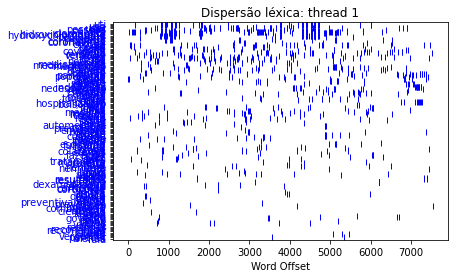

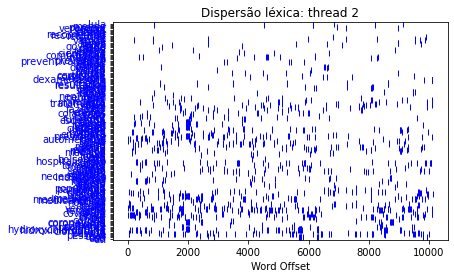

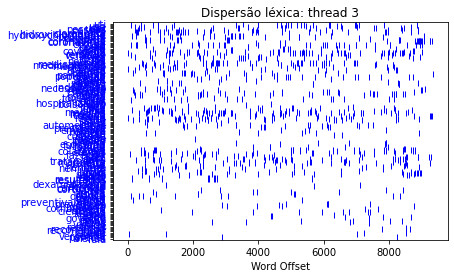

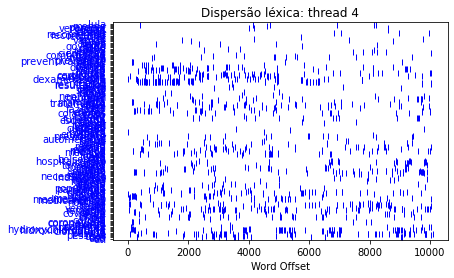

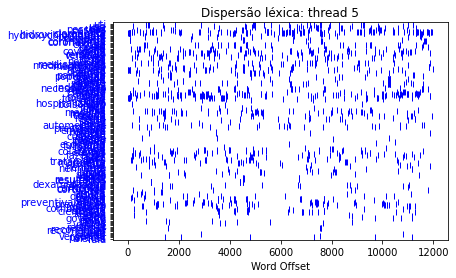

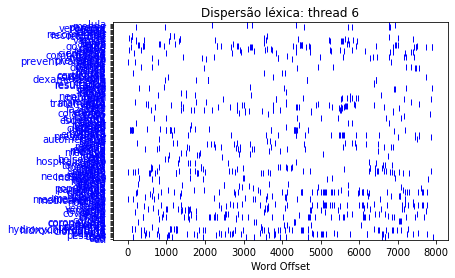

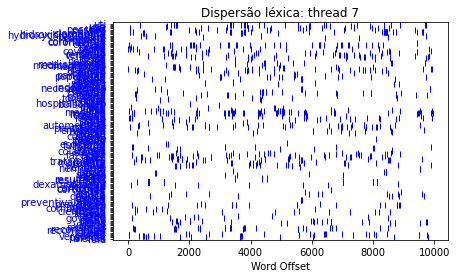

In [16]:
# palavras mais frequentes da nossa bag-of-words
target = ['uti','uso','usa','usar','pessoas','pessoa','alta','cloroquina','hidroxicloroquina','hydroxychloroquine','pacientes','paciente','deus','quatro','coronavírus','coronavirus','corona','sp','ser','brasil','fake','gente','covid-19','covid','vírus','remédio','verdade','ver','texto','todos','pé','notícias','noticia','medicamento','medicamentos','medicação','contra','hospital','agora','diz','dizendo','porque','pandemia','população','graças','saúde','casos','amém','morre','morreu','morrer','mortes','indivíduos','necessitando','mentira','estudo','estudos','mundo','bom','tomar','toma','tomaria','tomando','cura','curar','curam','hospitalização','bolsonaro','bozo','eua','fonte','dias','dia','médicos','médica','médico','corona','nada','record','certo','sabe','saber','vi','jornal','automedicar','aqui','melhor','presidente','emissora','moça','homem','testes','existe','cuidado','usual','news','passou','passar','chinês','china','esquerda','funciona','tv','tomou','globo','casa','colaterais','efeitos','faz','fazendo','fazer','fez','bem','anos','tratamento','mandetta','receita','fala','falar','nenhum','nenhuma','dr','risco','lúpus','bula','salvar','usado','acho','david','resultados','resultados','alho','cebola','🤣','dexametasona','sempre','sintomas','corticoide','corticóide','vários','cru','amiga','suco','nunca','doença','comer','trump','zinco','eficaz','preventivamente','prevenção','quiser','povo','malária','combinação','ciência','cientistas','indica','tempo','oms','razão','gado','governo','kkkk','reino','favor','cara','vamos','unido','pt','retomar','recomenda','recomendar','mar','citado','beira','coisas','vergonha','parecer','menos','lula']

nltk.draw.dispersion.dispersion_plot(text1, target, ignore_case=False, title='Dispersão léxica: thread 1')
nltk.draw.dispersion.dispersion_plot(text2, target, ignore_case=False, title='Dispersão léxica: thread 2')
nltk.draw.dispersion.dispersion_plot(text3, target, ignore_case=False, title='Dispersão léxica: thread 3')
nltk.draw.dispersion.dispersion_plot(text4, target, ignore_case=False, title='Dispersão léxica: thread 4')
nltk.draw.dispersion.dispersion_plot(text5, target, ignore_case=False, title='Dispersão léxica: thread 5')
nltk.draw.dispersion.dispersion_plot(text6, target, ignore_case=False, title='Dispersão léxica: thread 6')
nltk.draw.dispersion.dispersion_plot(text7, target, ignore_case=False, title='Dispersão léxica: thread 7')

A ferramenta tem suas limitações: por exemplo, ela não faz busca por conjuntos de palavras (frases nominais, n-gramas, collocations etc) e, aparentemente, só compara palavras individuais. Porém, visualizações geradas a partir de conjuntos específicos de palavras podem contar algumas histórias sobre os dados. Adiante, dá para perceber que no início da discussão muitos usuários questionaram a veracidade do conteúdo da postagem, e depois a discussão tomou outros rumos.

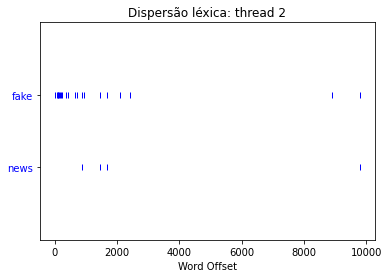

In [17]:
# dá pra perceber também como os usuários usam "fake" como sinônimo contraído de "fake news"
target = ['fake','news']
nltk.draw.dispersion.dispersion_plot(text2, target, ignore_case=False, title='Dispersão léxica: thread 2')

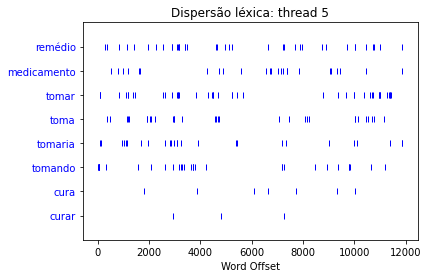

In [18]:
# usuários discutem a possibilidade de tomar a cloroquina
target = ['remédio','medicamento', 'tomar','toma','tomaria','tomando','cura','curar']
nltk.draw.dispersion.dispersion_plot(text5, target, ignore_case=False, title='Dispersão léxica: thread 5')

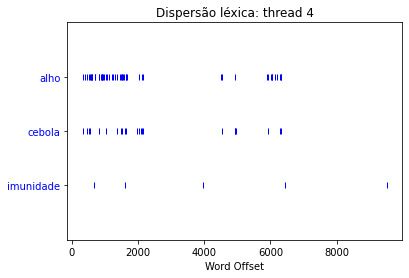

In [19]:
# usuários discutem receitas caseiras para aumentar a imunidade e evitar o contágio pelo coronavirus
target = ['alho','cebola', 'imunidade']
nltk.draw.dispersion.dispersion_plot(text4, target, ignore_case=False, title='Dispersão léxica: thread 4')

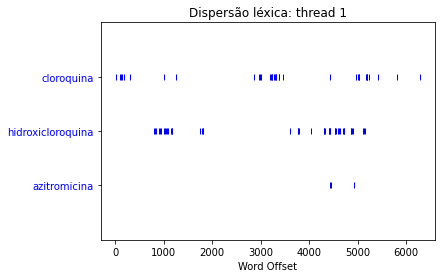

In [20]:
# citações aos medicamentos em testes
target = ['cloroquina','hidroxicloroquina', 'azitromicina']
nltk.draw.dispersion.dispersion_plot(text1, target, ignore_case=False, title='Dispersão léxica: thread 1')

Ainda que seus resultados não possibilitem generalizações muito conclusivas, essas experimentações com o texto fazem uso de métodos quantitativos que ajudam a levantar algumas sutilezas de ordem qualitativa. Analisando as colocações, as concordâncias e frequências, dá para perceber que os apoiadores do uso da cloroquina não manifestam em suas expressões textuais um apoio direto ao presidente Bolsonaro. Eles evidenciam a sua esperança em uma cura, fazem constantemente referências a "fé" e a "deus", mas não buscam questionar quando se deparam com afirmações sobre a possibilidade desse medicamento atuar na cura da covid-19. É somente quando aparece o discurso contraditório que esses apoiadores da cloroquina se manifestam mais politicamente, pedem fé e boa vontade de seus adversários argumentativos, ainda que por vezes exortem os participantes da discussão a não envolverem política no assunto. Quem mais faz referências ao Bolsonaro são justamente os seus opositores políticos, apontando contradições no discurso e questionando atitudes do presidente em relação às suas ações de combate a pandemia do Coronavirus.